In [8]:
#Loading database

import pandas as pd 
spotify_charts_df=r'C:\Users\KIIT\Downloads\charts.csv'

charts_csv=pd.read_csv(spotify_charts_df)
df=pd.DataFrame(sales_csv)
print(df)

                                  title  rank        date  \
0               Chantaje (feat. Maluma)     1  2017-01-01   
1           Vente Pa' Ca (feat. Maluma)     2  2017-01-01   
2            Reggaetón Lento (Bailemos)     3  2017-01-01   
3                                Safari     4  2017-01-01   
4                           Shaky Shaky     5  2017-01-01   
...                                 ...   ...         ...   
26173509                            BYE    46  2021-07-31   
26173510                        Pillars    47  2021-07-31   
26173511                   Gái Độc Thân    48  2021-07-31   
26173512  Renegade (feat. Taylor Swift)    49  2021-07-31   
26173513                Letter to Jarad    50  2021-07-31   

                                         artist  \
0                                       Shakira   
1                                  Ricky Martin   
2                                          CNCO   
3         J Balvin, Pharrell Williams, BIA, Sky   
4           

In [10]:
#Type of Dataset

print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [28]:
print(df.columns)

Index(['title', 'rank', 'date', 'artist', 'url', 'region', 'chart', 'trend',
       'streams', 'day_of_week'],
      dtype='object')


In [19]:
#Top 10 songs by total streams

top_songs = df.groupby('title')['streams'].sum().sort_values(ascending=False).head(10)
print(top_songs)


title
Shape of You                                     5.245740e+09
Blinding Lights                                  5.183476e+09
Dance Monkey                                     4.553471e+09
Someone You Loved                                4.000278e+09
Sunflower - Spider-Man: Into the Spider-Verse    3.786211e+09
Señorita                                         3.586041e+09
bad guy                                          3.468670e+09
Don't Start Now                                  3.256305e+09
Lucid Dreams                                     3.184855e+09
Happier                                          3.177046e+09
Name: streams, dtype: float64


In [20]:
#Variance of total streams by day of the week

df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.day_name()
streams_by_day = df.groupby('day_of_week')['streams'].sum()
print(streams_by_day)


day_of_week
Friday       1.754006e+11
Monday       1.559521e+11
Saturday     1.679322e+11
Sunday       1.491636e+11
Thursday     1.594105e+11
Tuesday      1.575325e+11
Wednesday    1.576237e+11
Name: streams, dtype: float64


In [22]:
#Average position of each artist on the charts

avg_position = df.groupby('artist')['rank'].mean().sort_values()
print(avg_position)


artist
Estebandido                          1.0
John Elliott                         1.0
Stefanos Pitsiniagkas                1.0
Facelift                             1.0
Brandon Wardell                      1.0
                                   ...  
Konex, Decky, Karlo, Yzomandias    200.0
Tagne, ElGrandeToto                200.0
Kim Wigaard, Sandra Lyng           200.0
Teza Sumendra                      200.0
XXXTENTACION, Tom. G               200.0
Name: rank, Length: 96156, dtype: float64


In [24]:
#Artists with most songs in the top 50

top_50 = df[df['rank'] <= 50]
top_artists_top_50 = top_50['artist'].value_counts().head(10)
print(top_artists_top_50)


artist
Ed Sheeran       121030
Billie Eilish     86286
The Weeknd        80989
Drake             76990
Bad Bunny         76677
Ariana Grande     76323
Post Malone       75470
Dua Lipa          74202
Doja Cat          59569
BTS               59516
Name: count, dtype: int64


In [38]:
#Songs exhibiting the greatest increase in streams over a week

weekly_streams = df.groupby(['title', 'date'])['streams'].sum().unstack().T
weekly_change = weekly_streams.diff().max().sort_values(ascending=False).head(10)
print(weekly_change)


title
Easy On Me                                     37737974.0
Last Christmas                                 22775687.0
All I Want for Christmas Is You                21884445.0
Despacito (Featuring Daddy Yankee)             16570078.0
SAD!                                           15242054.0
Sleigh Ride                                    14461525.0
Rockin' Around The Christmas Tree              14017408.0
bad guy                                        13899807.0
Jingle Bell Rock                               13675901.0
It's Beginning to Look a Lot like Christmas    13472559.0
dtype: float64


In [45]:
#Regions with highest average streams per song?

avg_streams_region = df.groupby('region')['streams'].mean().sort_values(ascending=False)
print(avg_streams_region)


region
Global           1.212938e+06
United States    3.902755e+05
Brazil           1.532626e+05
Mexico           1.272410e+05
Germany          1.117896e+05
                     ...     
Estonia          1.790920e+03
Latvia           1.728441e+03
Bulgaria         1.707868e+03
Luxembourg       1.658608e+03
Andorra                   NaN
Name: streams, Length: 70, dtype: float64


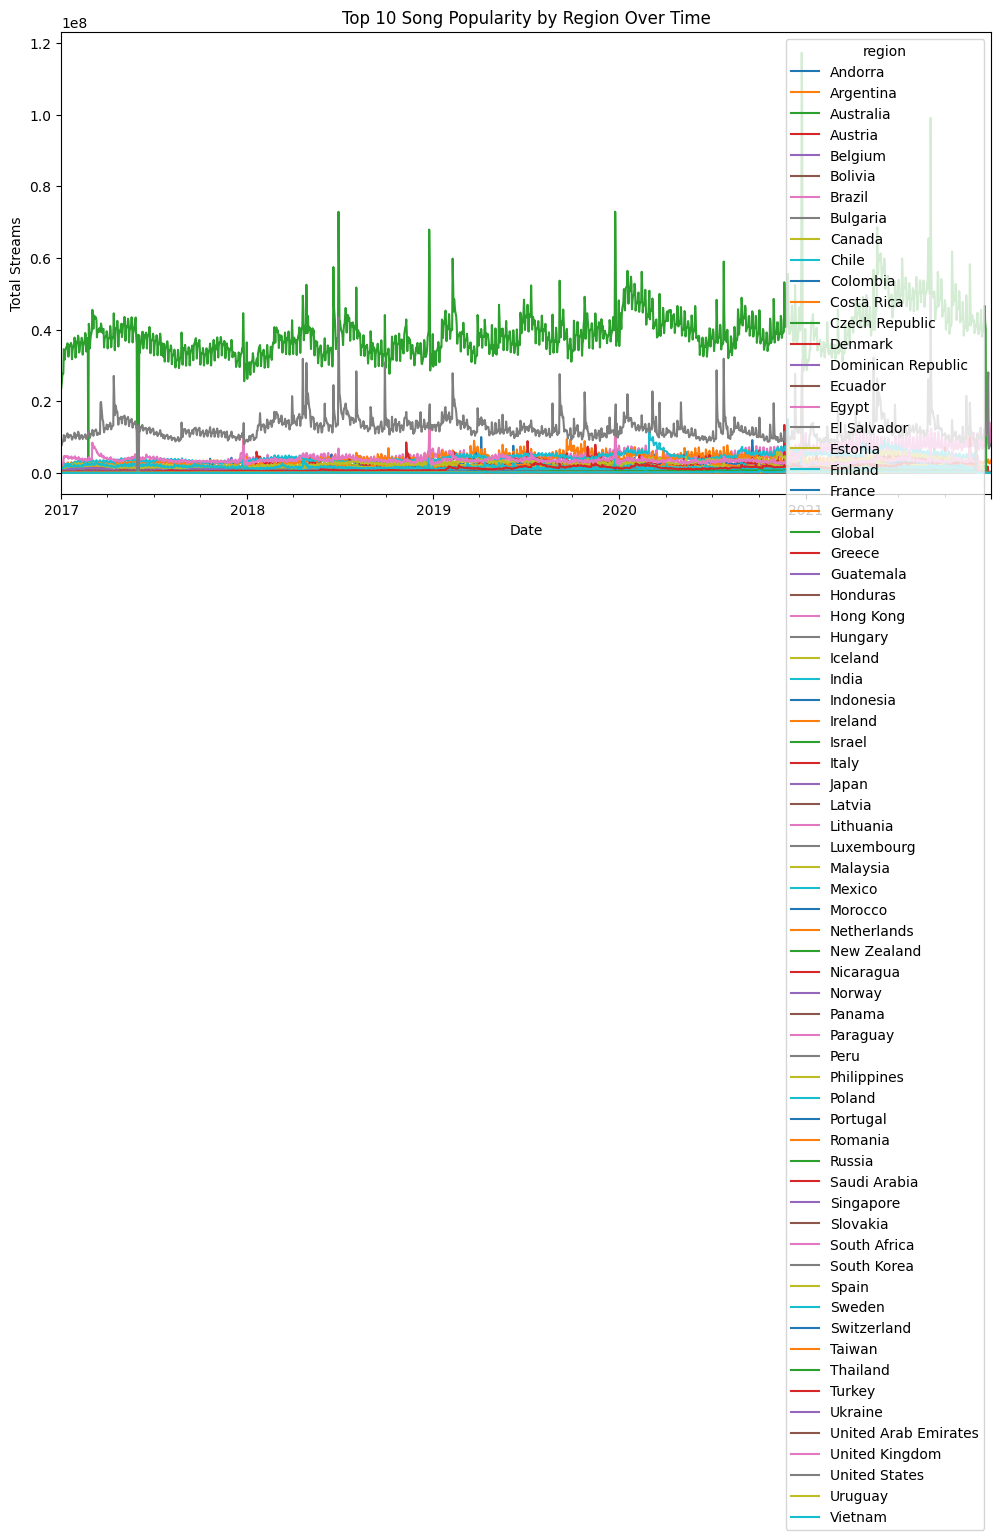

In [47]:
#Trend of song popularity for songs ranked in the top 10 across different regions

top_10 = df[df['rank'] <= 10]
region_trend = top_10.groupby(['date', 'region'])['streams'].sum().unstack().fillna(0)
region_trend.plot(figsize=(12, 6), title='Top 10 Song Popularity by Region Over Time')
plt.xlabel('Date')
plt.ylabel('Total Streams')
plt.show()


In [46]:
#Comparison of total streams for each trend type ('up', 'down', 'same position', 'new entry')

streams_by_trend = df.groupby('trend')['streams'].sum().sort_values(ascending=False)
print(streams_by_trend)


trend
MOVE_DOWN        4.375287e+11
MOVE_UP          3.992071e+11
SAME_POSITION    2.452231e+11
NEW_ENTRY        4.105634e+10
Name: streams, dtype: float64


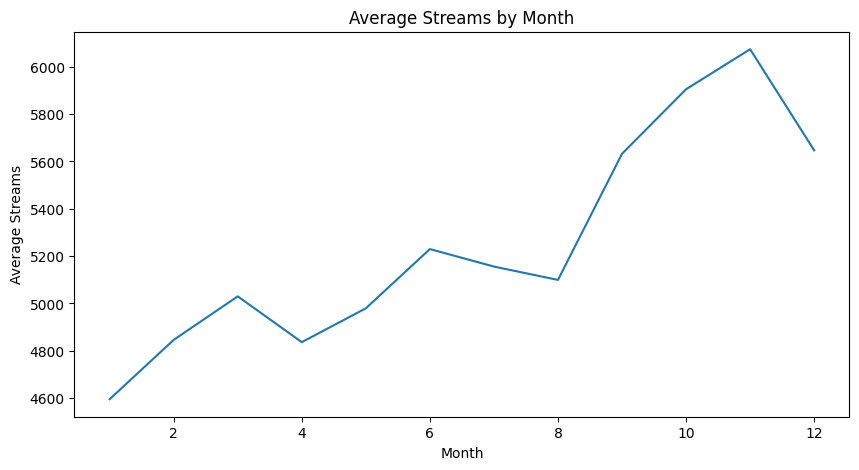

In [41]:
#Seasonal trends in song popularity

import matplotlib.pyplot as plt
df['month'] = df['date'].dt.month
seasonal_trends = df.groupby(['month', 'title'])['streams'].mean().unstack().fillna(0).mean(axis=1)
seasonal_trends.plot(kind='line', figsize=(10, 5), title='Average Streams by Month')
plt.xlabel('Month')
plt.ylabel('Average Streams')
plt.show()


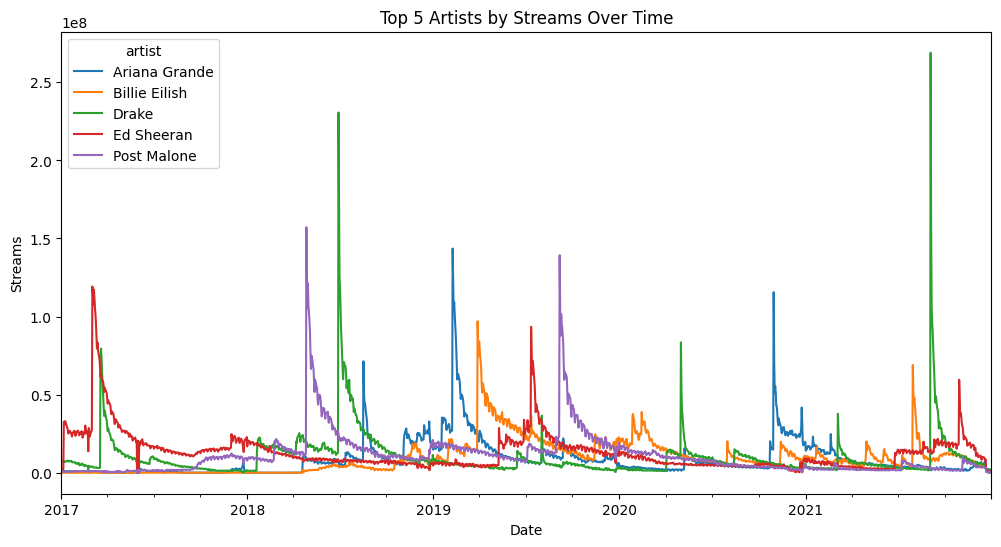

In [42]:
#Top 5 most popular artists over time based on cumulative streams

top_artists = df.groupby('artist')['streams'].sum().sort_values(ascending=False).head(5).index
top_artist_streams = df[df['artist'].isin(top_artists)].groupby(['date', 'artist'])['streams'].sum().unstack().fillna(0)
top_artist_streams.plot(figsize=(12, 6), title='Top 5 Artists by Streams Over Time')
plt.xlabel('Date')
plt.ylabel('Streams')
plt.show()


In [51]:
#Technical Statistics based on the dataset

# First few rows of the dataset

print("First Few Rows of the Dataset:")
print(df.head())
print("\n")

# Shape of the dataset
print("Shape of the Dataset (Rows, Columns):")
print(df.shape)
print("\n")

# Column names
print("Column Names:")
print(df.columns)
print("\n")

# Column data types
print("Column Data Types:")
print(df.dtypes)
print("\n")

# Missing values in each column
print("Missing Values in Each Column:")
print(df.isnull().sum())
print("\n")

# Number of unique values in each column
print("Number of Unique Values in Each Column:")
print(df.nunique())
print("\n")

# Summary statistics for numerical columns
print("Summary Statistics for Numerical Columns:")
print(df.describe())
print("\n")

# Summary statistics for categorical columns
print("Summary Statistics for Categorical Columns:")
print(df.describe(include=['object']))
print("\n")

# Count of non-null values in each column
print("Count of Non-Null Values in Each Column:")
print(df.count())
print("\n")

# Memory usage of the dataset
print("Memory Usage of the Dataset:")
print(df.memory_usage(deep=True))
print("\n")

# Check for duplicated rows
print("Number of Duplicated Rows:")
print(df.duplicated().sum())
print("\n")

# Overview of the dataset's index information
print("Index Information:")
print(df.index)
print("\n")


First Few Rows of the Dataset:
                         title  rank       date  \
0      Chantaje (feat. Maluma)     1 2017-01-01   
1  Vente Pa' Ca (feat. Maluma)     2 2017-01-01   
2   Reggaetón Lento (Bailemos)     3 2017-01-01   
3                       Safari     4 2017-01-01   
4                  Shaky Shaky     5 2017-01-01   

                                  artist  \
0                                Shakira   
1                           Ricky Martin   
2                                   CNCO   
3  J Balvin, Pharrell Williams, BIA, Sky   
4                           Daddy Yankee   

                                                 url     region   chart  \
0  https://open.spotify.com/track/6mICuAdrwEjh6Y6...  Argentina  top200   
1  https://open.spotify.com/track/7DM4BPaS7uofFul...  Argentina  top200   
2  https://open.spotify.com/track/3AEZUABDXNtecAO...  Argentina  top200   
3  https://open.spotify.com/track/6rQSrBHf7HlZjtc...  Argentina  top200   
4  https://open.spotif